## 14.4 Homework 
**re-uploaded 10/23 CORRECTED HOMEWORK**
- 1, Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.
- 2, rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.

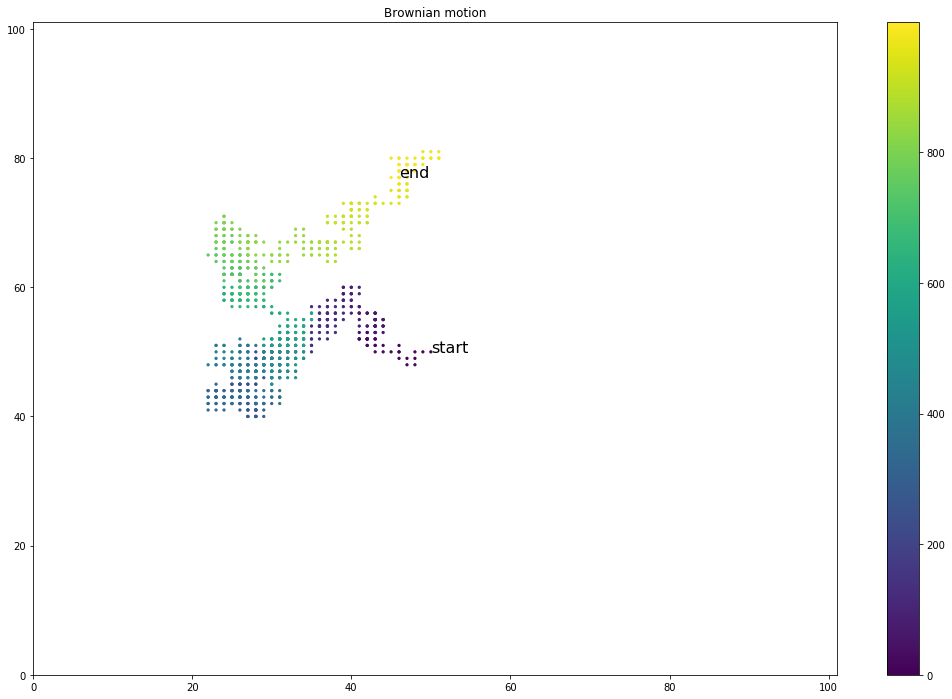

In [1]:
"""
Below is the code from lecture where we just plotted the Brownian motion.

"""

%matplotlib inline
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt


# init
L1 = 101
L2 = 101
N = 1000

fig = plt.figure(figsize=[18, 12])


position = np.empty([N,2])
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

# random walk
for i in range(1,N):
    position1 = [-1,-1]
    
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
     
    position[i,:] = position1
    
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.scatter(position[:,0], position[:,1], c=range(N), s=5)
plt.text(position[0,0], position[0,1], 'start', fontsize=16)
plt.text(position[-1,0], position[-1,1], 'end', fontsize=16)

plt.colorbar()
plt.show()

I couldn't figure out how to properly install and import vpython package, so I tried to use matplotlib's animation package instead. I got it to initially plot, but am having difficulty creating the actual animation. The code for this is below. For my animation attempt, I looked at the following website tutorial for reference: https://www.instructables.com/id/Animation-With-Python-and-Matplotlib/


**10/22 Update**
I was able to embed the animation by using javascript HTML. Previously, I couldn't embed the video in Jupyter, and I was having troubles installing FFMPEG writer to save the video. 

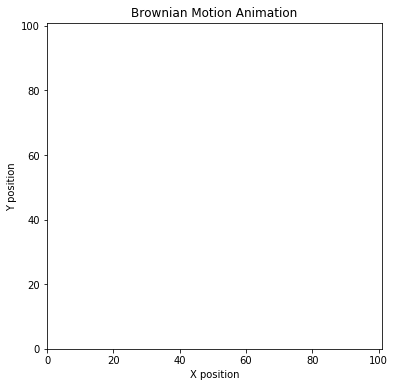

In [24]:
"""
Import relevant packages for calculation and animation in program.

I import HTML from IPython.display as I installed javascript 
to be able to embed the animation as an HTML video inside Jupyter notebook.


"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

L1 = 101
L2 = 101

fig = plt.figure(figsize = [6, 6])
ax = plt.axes(xlim=(0, L1), ylim=(0, L2))
plt.title('Brownian Motion Animation')
plt.xlabel('X position')
plt.ylabel('Y position')
N = 160

particle, = plt.plot([], [], 'ro')

In [27]:
xpos = int(L1/2)
ypos = int(L2/2)
position = [xpos, ypos]
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

def init():
    particle.set_data([], [])
    return particle,
  
def animate(t):
    global position
    position1 = [-1,-1]
       
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position + direction[move]
        
    position = position1
    
    particle.set_data(position[0], position[1])
    
    return particle,

particle_anim = animation.FuncAnimation(fig, animate, frames=N, init_func=init, interval=1, blit=True, repeat=True)

In [29]:
#particle_anim.save('particle.gif')
#HTML(particle_anim.to_html5_video())
HTML(particle_anim.to_jshtml())

Part 2)

From our lecture on radioactive decay, generate 1000 random numbers.


**10/22 Update**
Previously, I made a mistake with my random number distribution plot. Here I've corrected the random number distribution which now comes from the exponential distribution. The exponential distribution is generated from the uniform distribution as we discussed in lecture, from the following series of math steps:

$$1-2^{-dt/\tau} = 1-\exp(-\frac{dt}{\tau}\text{ln}2) = \frac{\text{ln}2}{\tau}dt$$

Form non-uniform probability distribution:

$$P(t)dt = 2^{-t/\tau}\frac{\text{ln}2}{\tau}dt$$

Begin change of coordinates:
$$p(x)dx = q(z)dz$$
$$\int_{-\infty}^{x(z)} p(x')dx' = \int_0^z dz'=z$$

mu factor defined as log(2)/tau

$$p(x)=\mu e^{-\mu x}$$

$$\mu \int_0^{x(z)} e^{-\mu x'} dx' = 1-e^{-\mu x} = z$$

Finally, we solve for x as a function of z, where we generate random z's to form our non-uniform distribution:

$$x = -\frac{1}{\mu}\text{ln}(1-z)$$

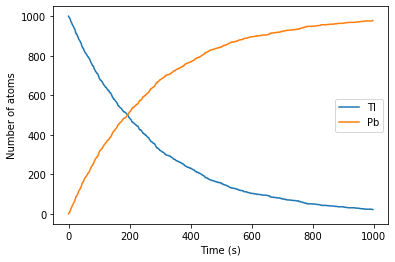

In [4]:
# To generate the exponential distribution from uniform distribution
import numpy as np
import matplotlib.pyplot as plt

tau = 3.053*60

N_atom = 1000   
N_time = 1000  

mu = np.log(2)/tau

N_Pb = np.zeros([N_time-1])  
N_Tl = N_atom * np.ones([N_time-1])


for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) 
    if x0<N_time:     
        N_Pb[x0:] += 1  
        N_Tl[x0:] -= 1  
        
plt.plot(N_Tl, label='Tl')
plt.plot(N_Pb, label='Pb')
plt.xlabel("Time (s)")
plt.ylabel("Number of atoms")

plt.legend()
plt.show()




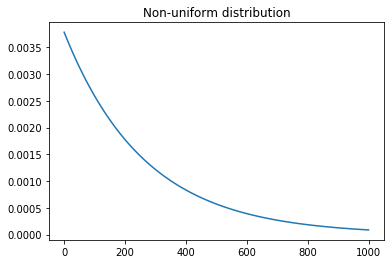

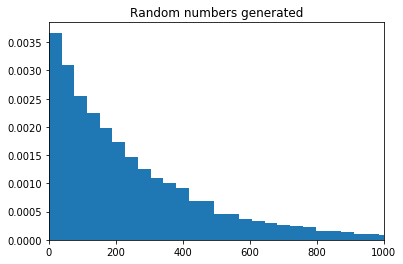

In [22]:
#Here I plot the non-uniform distribution we acquired from making the change in variables outlined above.
#I then plot a histogram of the random numbers generated from the change in variable 'x', where 'z' are randomly generated.
tau = 3.053*60
mu = np.log(2)/tau
y = (2**(-t/tau)*np.log(2)/tau)
t = np.linspace(0,1000,100)
N = 10000


x = []
for i in range(N):    
    z0 = np.random.random()
    x.append((-np.log(1-z0)/mu)) 
    #x.append(x0)
plt.plot(t, y)
plt.title("Non-uniform distribution")
plt.show()

plt.hist(x, bins=100, density=1)
plt.title("Random numbers generated")
plt.xlim(0, 1000)
plt.show()